In [10]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [12]:
df = pd.read_csv("data/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [14]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [16]:
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'ca', 'target']
df[categorical_cols] = df[categorical_cols].astype('category')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       303 non-null    int64   
 1   sex       303 non-null    category
 2   cp        303 non-null    category
 3   trestbps  303 non-null    int64   
 4   chol      303 non-null    int64   
 5   fbs       303 non-null    category
 6   restecg   303 non-null    category
 7   thalach   303 non-null    int64   
 8   exang     303 non-null    category
 9   oldpeak   303 non-null    float64 
 10  slope     303 non-null    category
 11  ca        303 non-null    category
 12  thal      303 non-null    category
 13  target    303 non-null    category
dtypes: category(9), float64(1), int64(4)
memory usage: 16.0 KB


In [32]:
df['exang'].unique()

[0, 1]
Categories (2, int64): [0, 1]

In [20]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       303 non-null    int64   
 1   sex       303 non-null    category
 2   cp        303 non-null    category
 3   trestbps  303 non-null    int64   
 4   chol      303 non-null    int64   
 5   fbs       303 non-null    category
 6   restecg   303 non-null    category
 7   thalach   303 non-null    int64   
 8   exang     303 non-null    category
 9   oldpeak   303 non-null    float64 
 10  slope     303 non-null    category
 11  ca        303 non-null    category
 12  thal      303 non-null    category
 13  target    303 non-null    category
dtypes: category(9), float64(1), int64(4)
memory usage: 16.0 KB


In [24]:
df.describe()

,age,trestbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


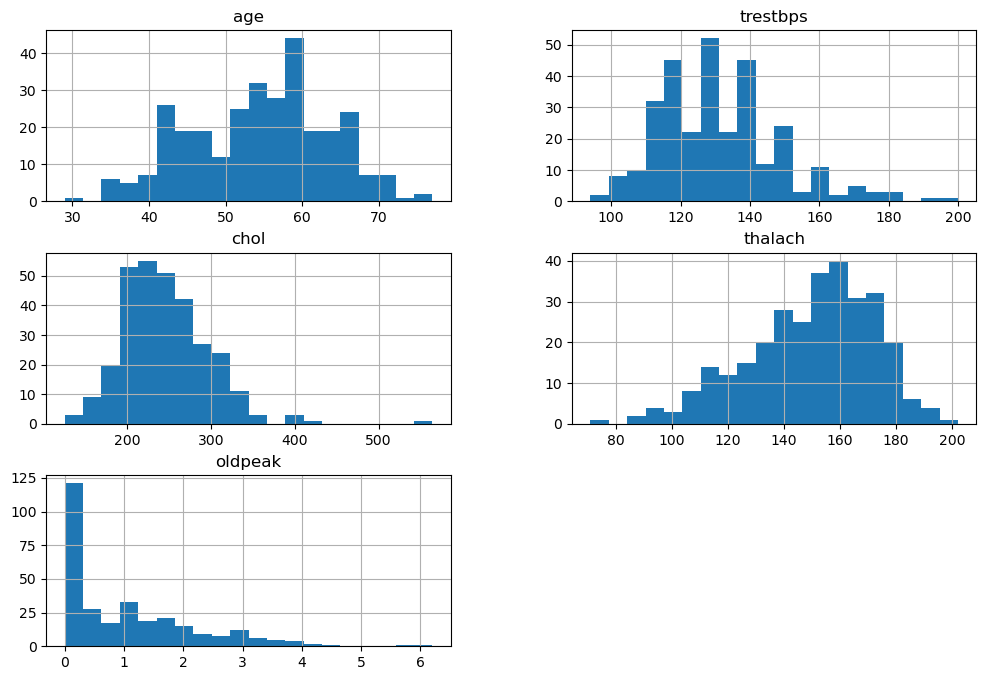

In [26]:
# Histogram

df.hist(figsize=(12,8), bins=20)  # Histogram
plt.show()

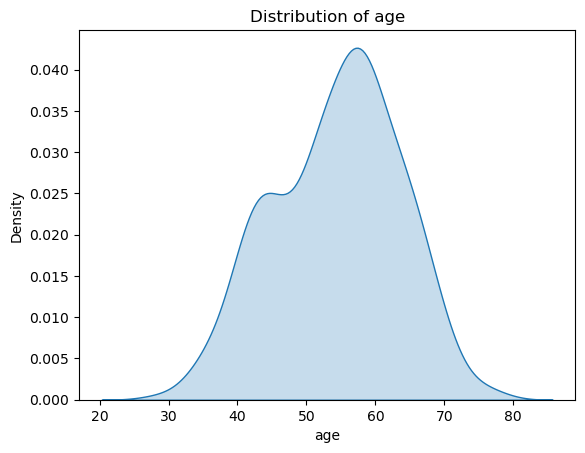

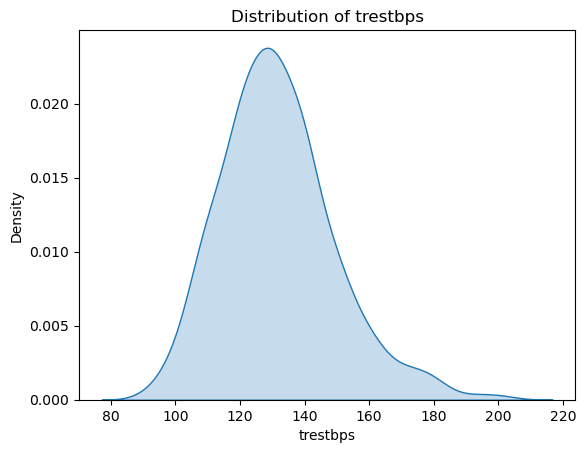

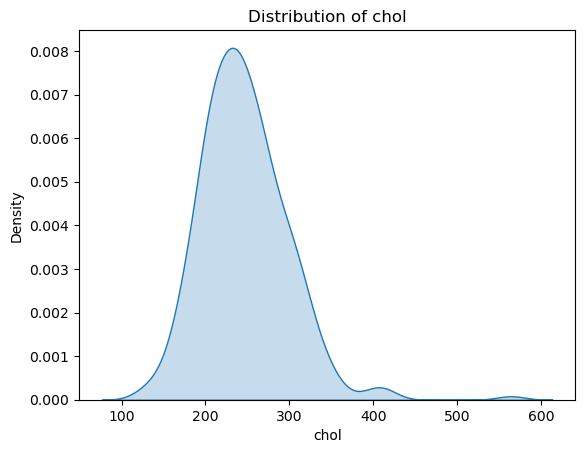

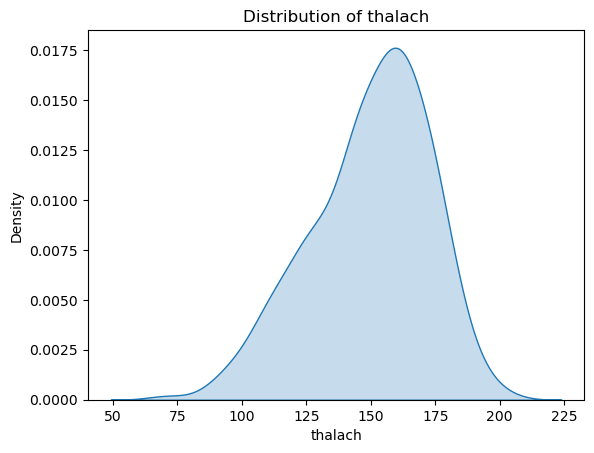

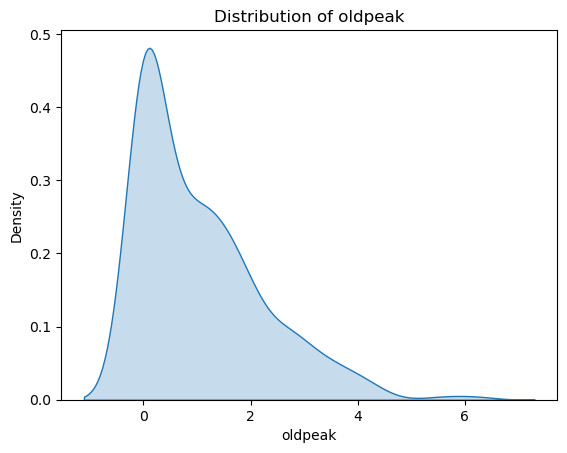

In [28]:
# OR KDE (density) plots
for col in ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']:
    sns.kdeplot(df[col], fill=True)
    plt.title(f'Distribution of {col}')
    plt.show()

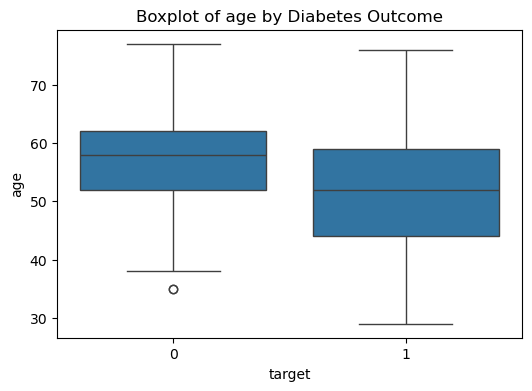

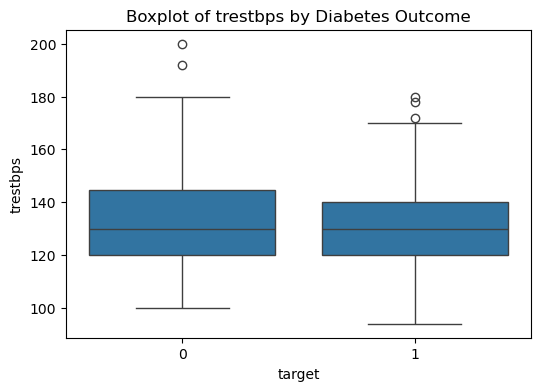

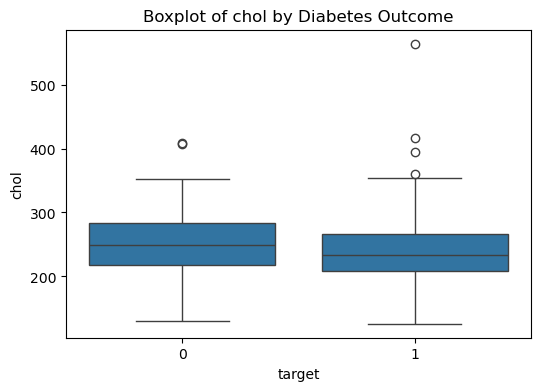

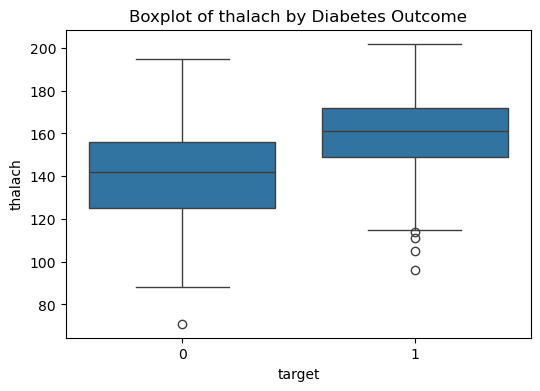

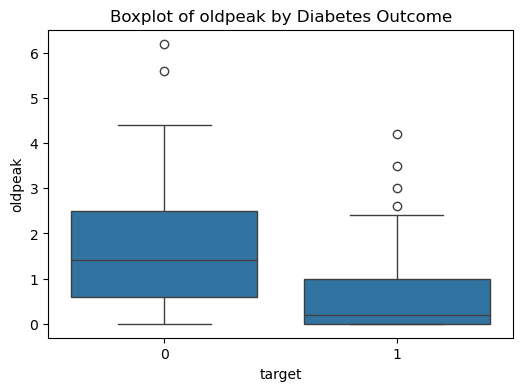

In [30]:
# Box Plots for outlieres

for col in ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']:
    plt.figure(figsize=(6,4))
    sns.boxplot(x="target", y=col, data=df)
    plt.title(f"Boxplot of {col} by Diabetes Outcome")
    plt.show()

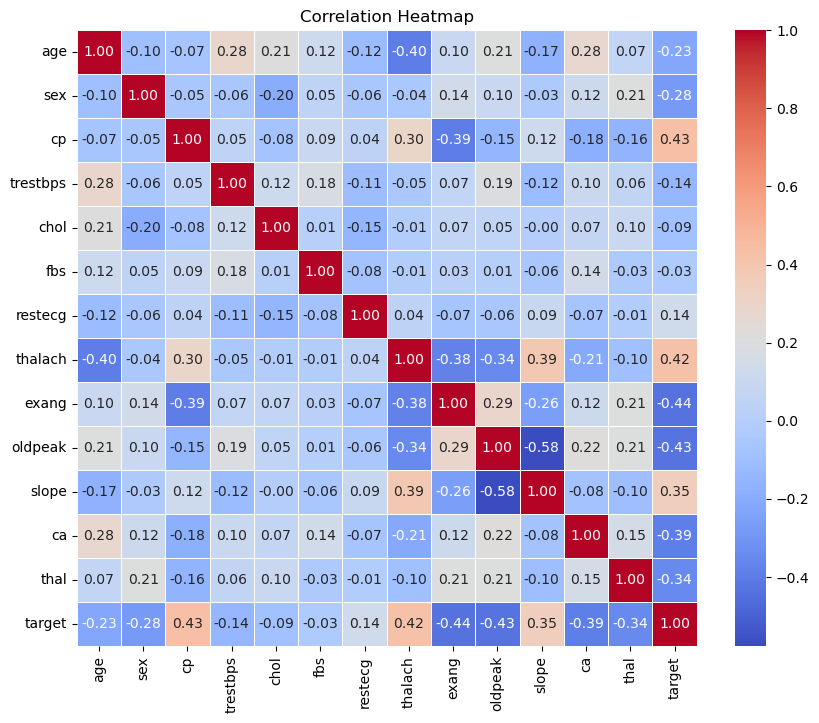

In [32]:
# Histogram

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Generate a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add a title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

In [34]:
# Remove outliers for 'trestbps', 'chol', 'thalach', 'oldpeak'

df = df[(df['trestbps'] <= df['trestbps'].quantile(0.95))]  # Remove extreme trestbps
df = df[(df['chol'] <= df['chol'].quantile(0.95))]  # Remove extreme chol
df = df[(df['thalach'] <= df['thalach'].quantile(0.95))]  # Remove extreme thalach
df = df[(df['oldpeak'] <= df['oldpeak'].quantile(0.95))]  # Remove extreme oldpeak

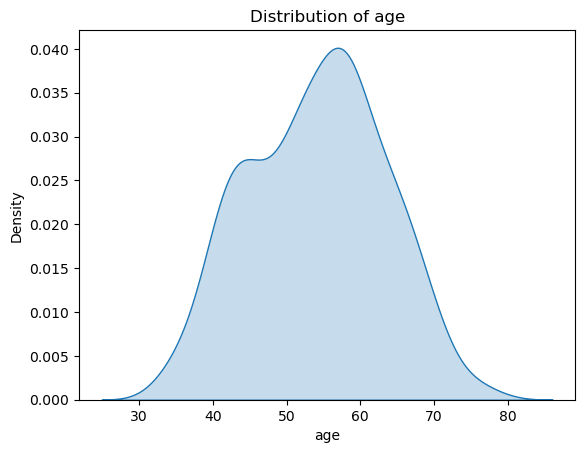

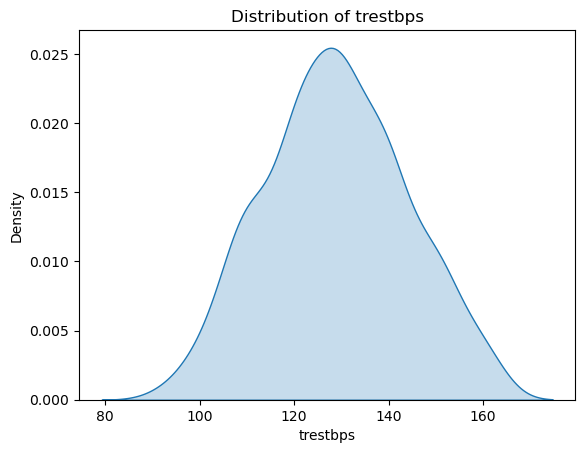

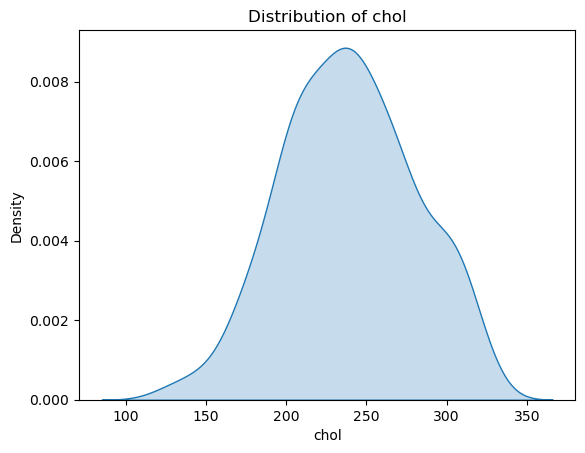

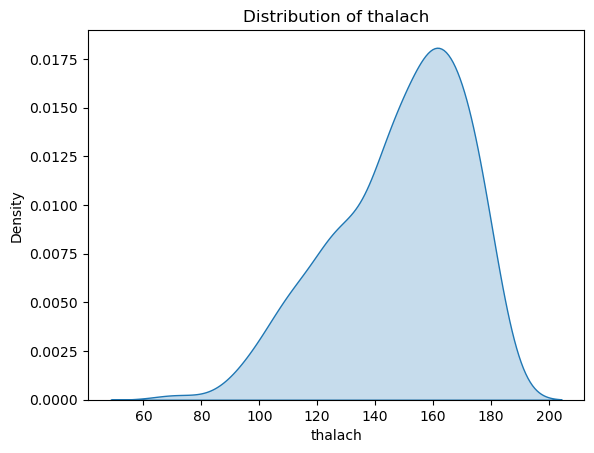

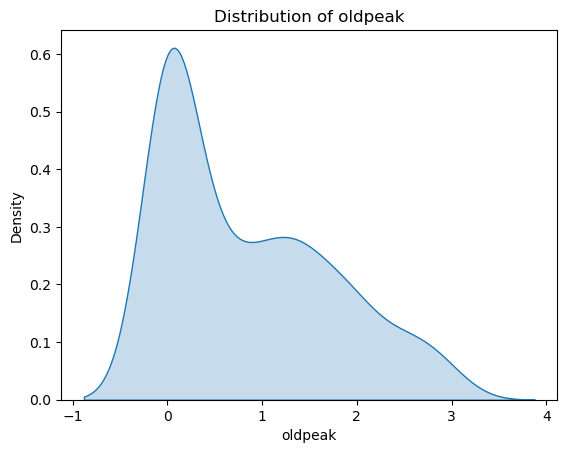

In [36]:
# OR KDE (density) plots
for col in ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']:
    sns.kdeplot(df[col], fill=True)
    plt.title(f'Distribution of {col}')
    plt.show()

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 249 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       249 non-null    int64   
 1   sex       249 non-null    category
 2   cp        249 non-null    category
 3   trestbps  249 non-null    int64   
 4   chol      249 non-null    int64   
 5   fbs       249 non-null    category
 6   restecg   249 non-null    category
 7   thalach   249 non-null    int64   
 8   exang     249 non-null    category
 9   oldpeak   249 non-null    float64 
 10  slope     249 non-null    category
 11  ca        249 non-null    category
 12  thal      249 non-null    category
 13  target    249 non-null    category
dtypes: category(9), float64(1), int64(4)
memory usage: 15.2 KB


In [40]:
df.describe()

,age,trestbps,chol,thalach,oldpeak
count,249.000000,249.000000,249.000000,249.000000,249.000000
mean,54.092369,128.927711,239.076305,148.473896,0.842169
std,9.145966,14.790567,41.280392,22.468085,0.883786
min,34.000000,94.000000,126.000000,71.000000,0.000000
25%,47.000000,120.000000,209.000000,132.000000,0.000000
50%,54.000000,130.000000,239.000000,152.000000,0.600000
75%,60.000000,140.000000,269.000000,165.000000,1.500000
max,77.000000,160.000000,325.000000,182.000000,3.000000


In [42]:
# Standard Scaler Normalization

scaler = StandardScaler()
featuresToScale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df[featuresToScale] = scaler.fit_transform(df[featuresToScale])

df.describe()

,age,trestbps,chol,thalach,oldpeak
count,2.490000e+02,2.490000e+02,2.490000e+02,2.490000e+02,2.490000e+02
mean,4.280378e-17,3.352963e-16,-1.551637e-16,5.421812e-16,8.560756e-17
std,1.002014e+00,1.002014e+00,1.002014e+00,1.002014e+00,1.002014e+00
min,-2.201281e+00,-2.366242e+00,-2.744743e+00,-3.455120e+00,-9.548295e-01
25%,-7.770261e-01,-6.048241e-01,-7.300532e-01,-7.346899e-01,-9.548295e-01
50%,-1.011982e-02,7.264419e-02,-1.852185e-03,1.572545e-01,-2.745647e-01
75%,6.472284e-01,7.501125e-01,7.263488e-01,7.370183e-01,7.458325e-01
max,2.509715e+00,2.105049e+00,2.085657e+00,1.495171e+00,2.446495e+00


In [44]:
df['target'].value_counts(normalize=True)

target
1    0.578313
0    0.421687
Name: proportion, dtype: float64

In [46]:
# Split the data

X = df.drop('target', axis=1)
Y = df['target']


In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(174, 13) (75, 13)
(174,) (75,)


In [50]:
# Train Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, Y_train)

# Make predictions
Y_pred = model.predict(X_test)

# Evaluate performance
print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy:.2%}")

              precision    recall  f1-score   support

           0       0.86      0.71      0.78        35
           1       0.78      0.90      0.84        40

    accuracy                           0.81        75
   macro avg       0.82      0.81      0.81        75
weighted avg       0.82      0.81      0.81        75

[[25 10]
 [ 4 36]]
Accuracy: 81.33%


In [52]:
# SVM Model
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


svm_model = SVC(kernel='linear', random_state=42)  # Linear kernel
svm_model.fit(X_train, Y_train)

Y_pred = svm_model.predict(X_test)

# Accuracy Score
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy:.2%}")

# Confusion Matrix
print('Confusion Matrix:\n', confusion_matrix(Y_test, Y_pred))

# Classification Report
print('Classification Report:\n', classification_report(Y_test, Y_pred))

Accuracy: 76.00%
Confusion Matrix:
 [[21 14]
 [ 4 36]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.60      0.70        35
           1       0.72      0.90      0.80        40

    accuracy                           0.76        75
   macro avg       0.78      0.75      0.75        75
weighted avg       0.78      0.76      0.75        75

